 #  A Whale off the Port(folio)
 ---

 In this assignment, you'll get to use what you've learned this week to evaluate the performance among various algorithmic, hedge, and mutual fund portfolios and compare them against the S&P TSX 60 Index.

In [603]:
# Initial imports
import pandas as pd
import numpy as np
import datetime as dt
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline



# Data Cleaning

In this section, you will need to read the CSV files into DataFrames and perform any necessary data cleaning steps. After cleaning, combine all DataFrames into a single DataFrame.

Files:

* `whale_returns.csv`: Contains returns of some famous "whale" investors' portfolios.

* `algo_returns.csv`: Contains returns from the in-house trading algorithms from Harold's company.

* `sp_tsx_history.csv`: Contains historical closing prices of the S&P TSX 60 Index.

## Whale Returns

Read the Whale Portfolio daily returns and clean the data.

In [604]:
# Set file paths
algo_returns = Path("../Resources/algo_returns.csv")
l_historical = Path("../Resources/l_historical.csv")
otex_historical = Path("../Resources/otex_historical.csv")
shop_historical = Path("../Resources/shop_historical.csv")
sp_tsx_historical = Path("../Resources/sp_tsx_history.csv")
whale_returns = Path("../Resources/whale_returns.csv")


In [605]:
# Read CSVs and combine all dataframes into a dataframe 
algo_returns_df = pd.read_csv(algo_returns, index_col='Date', parse_dates=True)
sp_tsx_historical_df = pd.read_csv(sp_tsx_historical, index_col='Date', parse_dates=True)
whale_returns_df = pd.read_csv(whale_returns, index_col='Date', parse_dates=True)

In [606]:
# Reading whale returns
whale_returns_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC
Date,,,,
2015-03-02,NaN,NaN,NaN,NaN
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569
2015-03-04,0.002230,0.003241,-0.002534,0.004213
2015-03-05,0.004016,0.004076,0.002355,0.006726
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098


In [607]:
# Count nulls
whale_returns_df.isnull().sum()

SOROS FUND MANAGEMENT LLC      1
PAULSON & CO.INC.              1
TIGER GLOBAL MANAGEMENT LLC    1
BERKSHIRE HATHAWAY INC         1
dtype: int64

In [608]:
# Drop nulls
whale_returns_df = whale_returns_df.dropna()


## Algorithmic Daily Returns

Read the algorithmic daily returns and clean the data.

In [609]:
# Reading algorithmic returns
algo_returns_df.head()

,Algo 1,Algo 2
Date,,
2014-05-28,0.001745,NaN
2014-05-29,0.003978,NaN
2014-05-30,0.004464,NaN
2014-06-02,0.005692,NaN
2014-06-03,0.005292,NaN


In [610]:
# Count nulls
algo_returns_df.isnull().sum()

Algo 1    0
Algo 2    6
dtype: int64

In [611]:
# Drop nulls
algo_returns_df = algo_returns_df.dropna()

## S&P TSX 60 Returns

Read the S&P TSX 60 historic closing prices and create a new daily returns DataFrame from the data. 

In [612]:
# Reading S&P TSX 60 Closing Prices
sp_tsx_historical_df.head()

,Close
Date,
2012-10-01,"$12,370.19"
2012-10-02,"$12,391.23"
2012-10-03,"$12,359.47"
2012-10-04,"$12,447.68"
2012-10-05,"$12,418.99"


In [613]:
# Check Data Types
print(sp_tsx_historical_df.dtypes)

Close    object
dtype: object


In [614]:
# Fix Data Types
sp_tsx_historical_df['Close'] = sp_tsx_historical_df['Close'].replace('[\$,]', '', regex=True).astype(float)

# Display the first few rows of the cleaned dataframe with the 'Close' column as float
print(sp_tsx_historical_df.head())

# Check data types of columns in the sp_tsx_historical dataframe again
print(sp_tsx_historical_df.dtypes)


               Close
Date                
2012-10-01  12370.19
2012-10-02  12391.23
2012-10-03  12359.47
2012-10-04  12447.68
2012-10-05  12418.99
Close    float64
dtype: object


In [615]:
# Calculate Daily Returns
sp_tsx_historical_df['Close'] = sp_tsx_historical_df['Close'].pct_change()
sp_tsx_historical_df.head()

,Close
Date,
2012-10-01,NaN
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305


In [616]:
# Drop nulls
sp_tsx_historical_df.isnull().sum()
sp_tsx_historical_df = sp_tsx_historical_df.dropna()

In [617]:
# Rename `Close` Column to be specific to this portfolio.
sp_tsx_historical_df.rename(columns={'Close': 'sp_tsx_returns'}, inplace=True)
sp_tsx_historical_df.head()

,sp_tsx_returns
Date,
2012-10-02,0.001701
2012-10-03,-0.002563
2012-10-04,0.007137
2012-10-05,-0.002305
2012-10-09,-0.011709


## Combine Whale, Algorithmic, and S&P TSX 60 Returns

In [618]:
# Join Whale Returns, Algorithmic Returns, and the S&P TSX 60 Returns into a single DataFrame with columns for each portfolio's returns.
combined_df = pd.concat([whale_returns_df, algo_returns_df, sp_tsx_historical_df], axis=1, join='inner')
combined_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,Algo 1,Algo 2,sp_tsx_returns
Date,,,,,,,
2015-03-03,-0.001266,-0.004981,-0.000496,-0.006569,-0.001942,-0.000949,-0.008530
2015-03-04,0.002230,0.003241,-0.002534,0.004213,-0.008589,0.002416,-0.003371
2015-03-05,0.004016,0.004076,0.002355,0.006726,-0.000955,0.004323,0.001344
2015-03-06,-0.007905,-0.003574,-0.008481,-0.013098,-0.004957,-0.011460,-0.009972
2015-03-09,0.000582,0.004225,0.005843,-0.001652,-0.005447,0.001303,-0.006555


---

# Conduct Quantitative Analysis

In this section, you will calculate and visualize performance and risk metrics for the portfolios.

## Performance Anlysis

#### Calculate and Plot the daily returns.

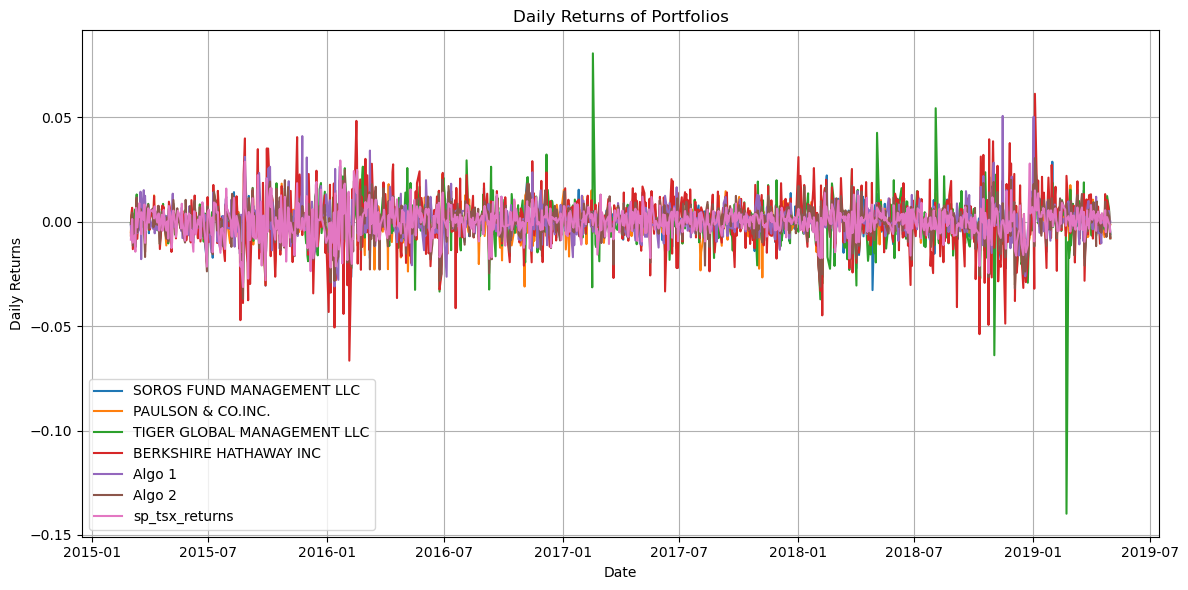

In [619]:
# Plot daily returns of all portfolios
plt.figure(figsize=(12, 6))
for column in combined_df.columns:
    plt.plot(combined_df.index, combined_df[column], label=column)

plt.xlabel('Date')
plt.ylabel('Daily Returns')
plt.title('Daily Returns of Portfolios')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#### Calculate and Plot cumulative returns.

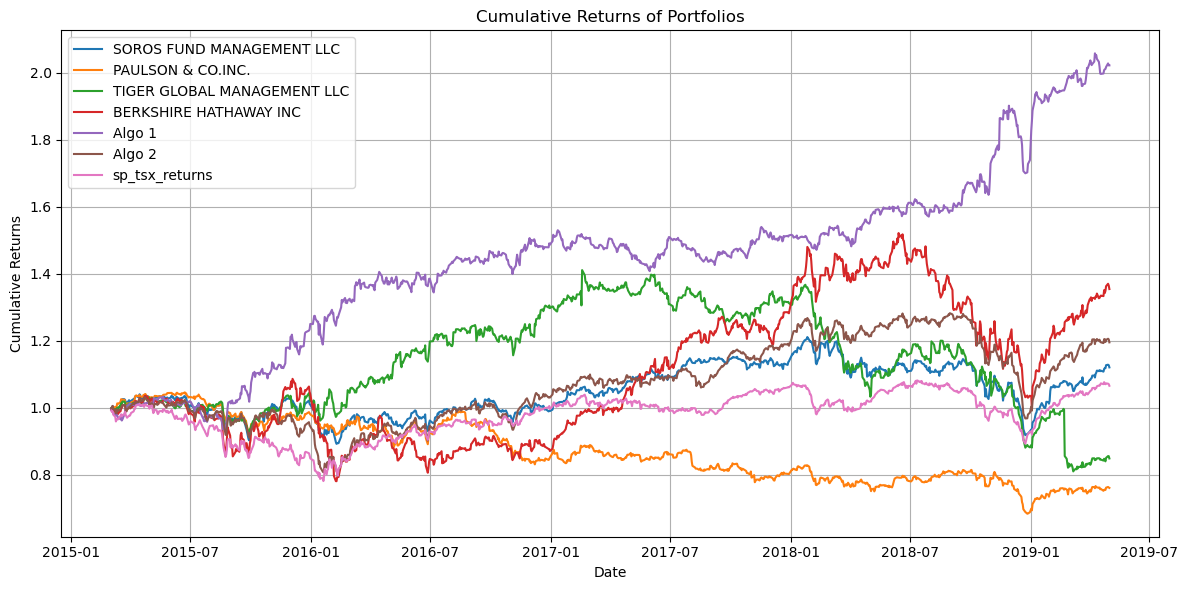

In [620]:
# Calculate cumulative returns of all portfolios
cumulative_returns = (1 + combined_df).cumprod()

# Plot cumulative returns
plt.figure(figsize=(12, 6))
for column in cumulative_returns.columns:
    plt.plot(cumulative_returns.index, cumulative_returns[column], label=column)

plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.title('Cumulative Returns of Portfolios')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

---

## Risk Analysis

Determine the _risk_ of each portfolio:

1. Create a box plot for each portfolio. 
2. Calculate the standard deviation for all portfolios.
4. Determine which portfolios are riskier than the S&P TSX 60.
5. Calculate the Annualized Standard Deviation.

### Create a box plot for each portfolio


In [621]:
print(combined_df.columns)

Index(['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ',
       'TIGER GLOBAL MANAGEMENT LLC', 'BERKSHIRE HATHAWAY INC', 'Algo 1',
       'Algo 2', 'sp_tsx_returns'],
      dtype='object')


Text(0, 0.5, 'Daily Returns')

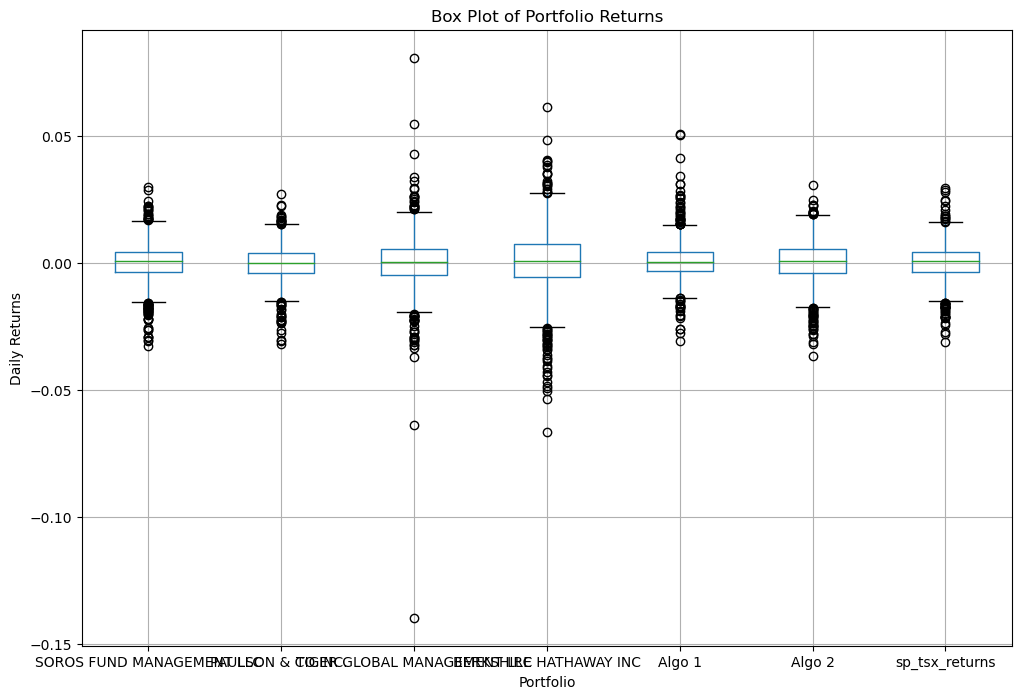

In [622]:
# Box plot to visually show risk
# Create a box plot for each portfolio's returns
combined_df.boxplot(column=['SOROS FUND MANAGEMENT LLC', 'PAULSON & CO.INC. ', 'TIGER GLOBAL MANAGEMENT LLC',
                            'BERKSHIRE HATHAWAY INC', 'Algo 1', 'Algo 2', 'sp_tsx_returns'], figsize=(12, 8))

# Set plot title and labels
plt.title('Box Plot of Portfolio Returns')
plt.xlabel('Portfolio')
plt.ylabel('Daily Returns')

### Calculate Standard Deviations

In [623]:
# Calculate the daily standard deviations of all portfolios
daily_std_dev = combined_df.std(axis=0)

# Display the results
print(daily_std_dev)

SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
sp_tsx_returns                 0.007034
dtype: float64


### Determine which portfolios are riskier than the S&P TSX 60

In [624]:
# Calculate  the daily standard deviation of S&P TSX 60
sp_tsx_std = sp_tsx_historical_df['sp_tsx_returns'].std()
print("S&P TSX 60 Daily Standard Deviation:", sp_tsx_std)


S&P TSX 60 Daily Standard Deviation: 0.006637362556692504


In [625]:
# Determine which portfolios are riskier than the S&P TSX 60
riskier_portfolios = daily_std_dev[daily_std_dev > sp_tsx_std]
print("Portfolios Riskier than S&P TSX 60:")
print(riskier_portfolios)

Portfolios Riskier than S&P TSX 60:
SOROS FUND MANAGEMENT LLC      0.007828
PAULSON & CO.INC.              0.006982
TIGER GLOBAL MANAGEMENT LLC    0.010883
BERKSHIRE HATHAWAY INC         0.012826
Algo 1                         0.007589
Algo 2                         0.008326
sp_tsx_returns                 0.007034
dtype: float64


### Calculate the Annualized Standard Deviation

In [626]:
# Calculate the annualized standard deviation (252 trading days)
daily_std_dev = combined_df.std(axis=0)
annualized_std_dev = daily_std_dev * np.sqrt(252)

# Display the annualized standard deviation
print("Annualized Standard Deviation of Portfolios:")
print(annualized_std_dev)

Annualized Standard Deviation of Portfolios:
SOROS FUND MANAGEMENT LLC      0.124259
PAULSON & CO.INC.              0.110841
TIGER GLOBAL MANAGEMENT LLC    0.172759
BERKSHIRE HATHAWAY INC         0.203599
Algo 1                         0.120470
Algo 2                         0.132177
sp_tsx_returns                 0.111664
dtype: float64


---

## Rolling Statistics

Risk changes over time. Analyze the rolling statistics for Risk and Beta. 

1. Calculate and plot the rolling standard deviation for all portfolios using a 21-day window.
2. Calculate the correlation between each stock to determine which portfolios may mimick the S&P TSX 60.
3. Choose one portfolio, then calculate and plot the 60-day rolling beta for it and the S&P TSX 60.

### Calculate and plot rolling `std` for all portfolios with 21-day window

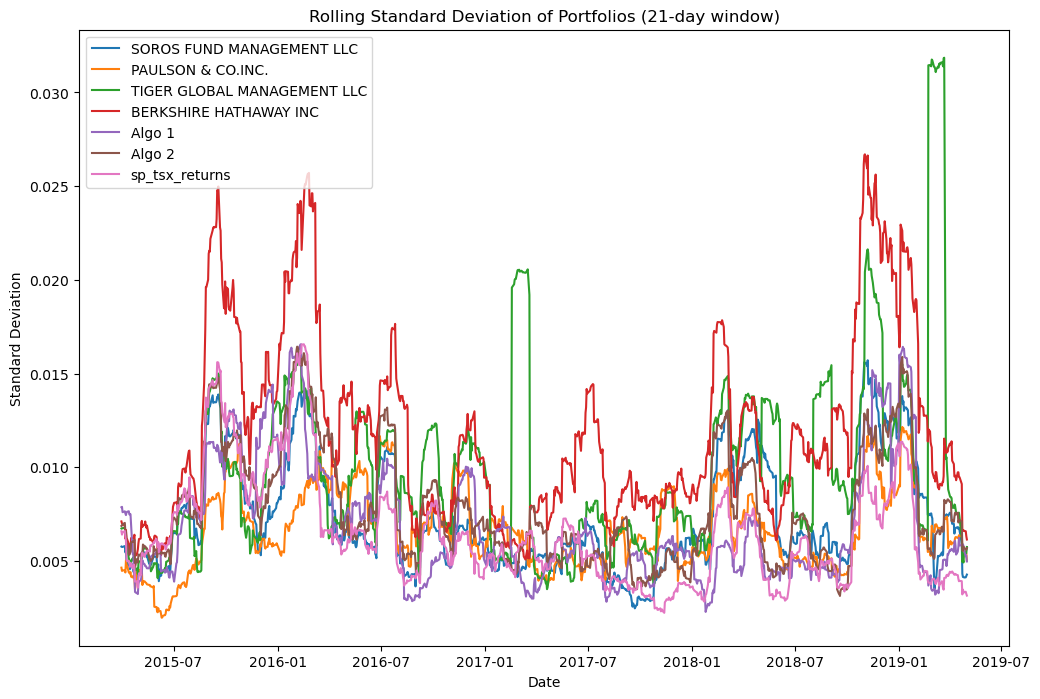

In [627]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
rolling_std_dev = combined_df.rolling(window=21).std()

# Plot the rolling standard deviation
plt.figure(figsize=(12, 8))
for column in rolling_std_dev.columns:
    plt.plot(rolling_std_dev.index, rolling_std_dev[column], label=column)
#Set the plot title and labels 
plt.title('Rolling Standard Deviation of Portfolios (21-day window)')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend(loc='upper left')
plt.show()


### Calculate and plot the correlation

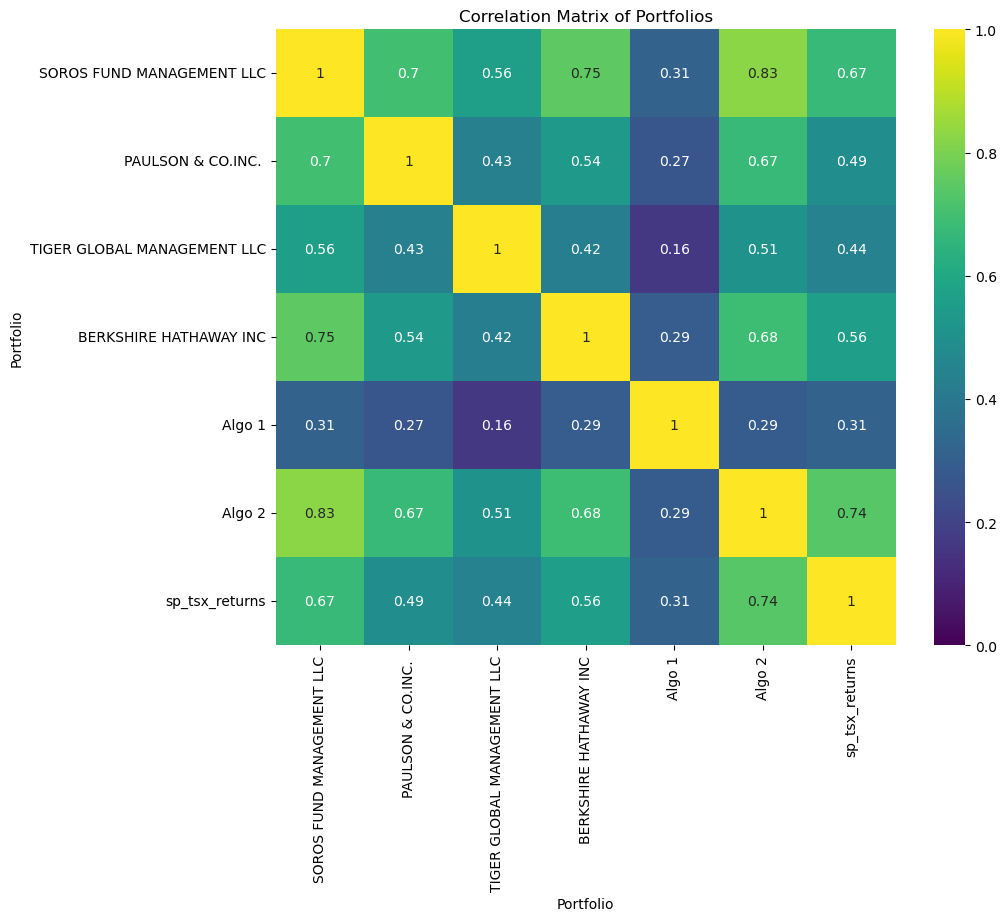

In [628]:
# Calculate the correlation
correlation_matrix = combined_df.corr()

# Display de correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', vmin=0, vmax=1)

#Set plotting title and labels 
plt.title('Correlation Matrix of Portfolios')
plt.xlabel('Portfolio')
plt.ylabel('Portfolio')
plt.show()


### Calculate and Plot Beta for a chosen portfolio and the S&P 60 TSX

Covariance of BERKSHIRE HATHAWAY INC with S&P TSX 60: 5.027336077110012e-05
Variance of S&P TSX 60: 4.9479515915131015e-05
Beta of BERKSHIRE HATHAWAY INC with S&P TSX 60: 1.0160439091063609


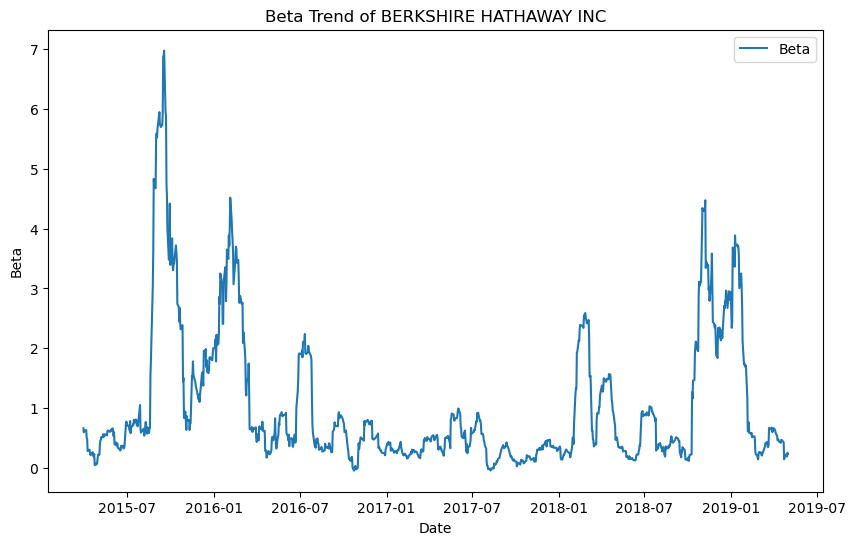

In [629]:
# Calculate covariance of a single portfolio
BH_INC = 'BERKSHIRE HATHAWAY INC'
portfolio_returns = combined_df[BH_INC]
sp_tsx_returns = combined_df['sp_tsx_returns']
covariance = portfolio_returns.cov(sp_tsx_returns)
print("Covariance of", BH_INC, "with S&P TSX 60:", covariance)

# Calculate variance of S&P TSX
sp_tsx_variance = sp_tsx_returns.var()
print("Variance of S&P TSX 60:", sp_tsx_variance)

# Computing beta
beta = covariance / sp_tsx_variance
print("Beta of", BH_INC, "with S&P TSX 60:", beta)

# Plot beta trend for chosen portfolio and S&P 60 TSX 
plt.figure(figsize=(10, 6))
plt.plot(portfolio_returns.index, portfolio_returns.rolling(window=21).cov(sp_tsx_returns) / sp_tsx_variance, label='Beta')
plt.xlabel('Date')
plt.ylabel('Beta')
plt.title('Beta Trend of ' + BH_INC)
plt.legend()
plt.show()

## Rolling Statistics Challenge: Exponentially Weighted Average 

An alternative way to calculate a rolling window is to take the exponentially weighted moving average. This is like a moving window average, but it assigns greater importance to more recent observations. Try calculating the [`ewm`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.ewm.html) with a 21-day half life for each portfolio, using standard deviation (`std`) as the metric of interest.

In [630]:
# Use `ewm` to calculate the rolling window
# Calculate the rolling EWMA with a 21-day half-life for each portfolio
half_life_days = 21
rolling_ewma = combined_df.ewm(halflife=half_life_days).std()


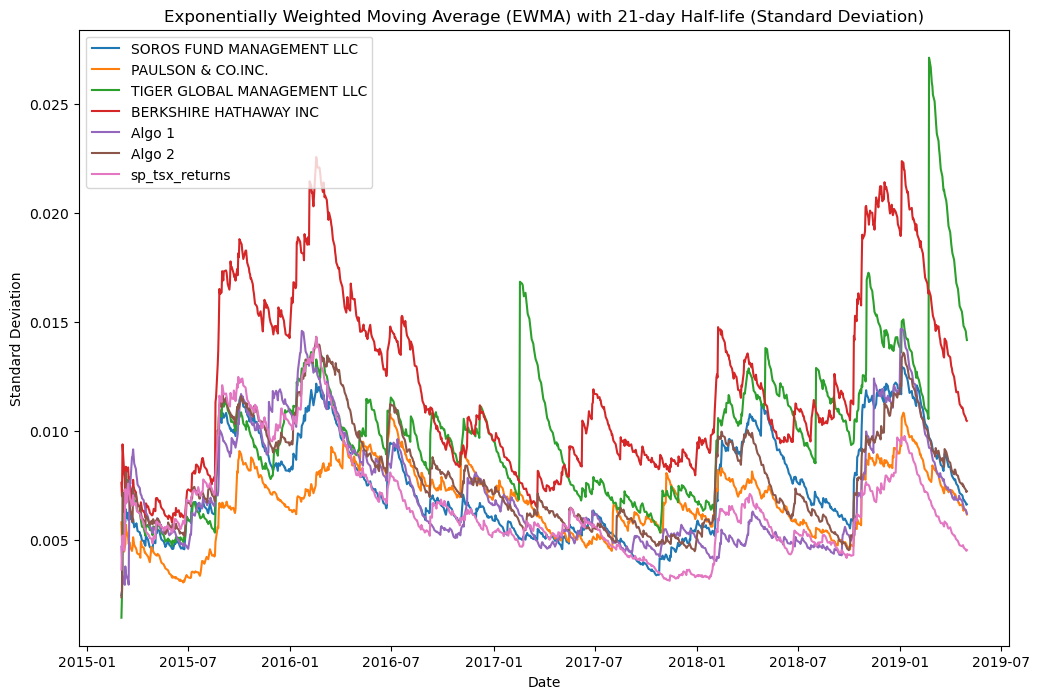

In [631]:
# Plot the rolling EWMA for each portfolio
plt.figure(figsize=(12, 8))
for column in rolling_ewma.columns:
    plt.plot(rolling_ewma.index, rolling_ewma[column], label=column)
    
#set the plot title and labels and plot
plt.title('Exponentially Weighted Moving Average (EWMA) with 21-day Half-life (Standard Deviation)')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend(loc='upper left')
plt.show()

---

# Sharpe Ratios
In reality, investment managers and thier institutional investors look at the ratio of return-to-risk, and not just returns alone. After all, if you could invest in one of two portfolios, and each offered the same 10% return, yet one offered lower risk, you'd take that one, right?

### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [632]:
# Annualized Sharpe Ratios
mean_daily_returns = combined_df.mean()
std_daily_returns = combined_df.std()

# Assume a risk-free rate of 0 (you can change this if needed)
risk_free_rate = 0

# Calculate the Sharpe ratios
sharpe_ratios = (mean_daily_returns - risk_free_rate) / std_daily_returns

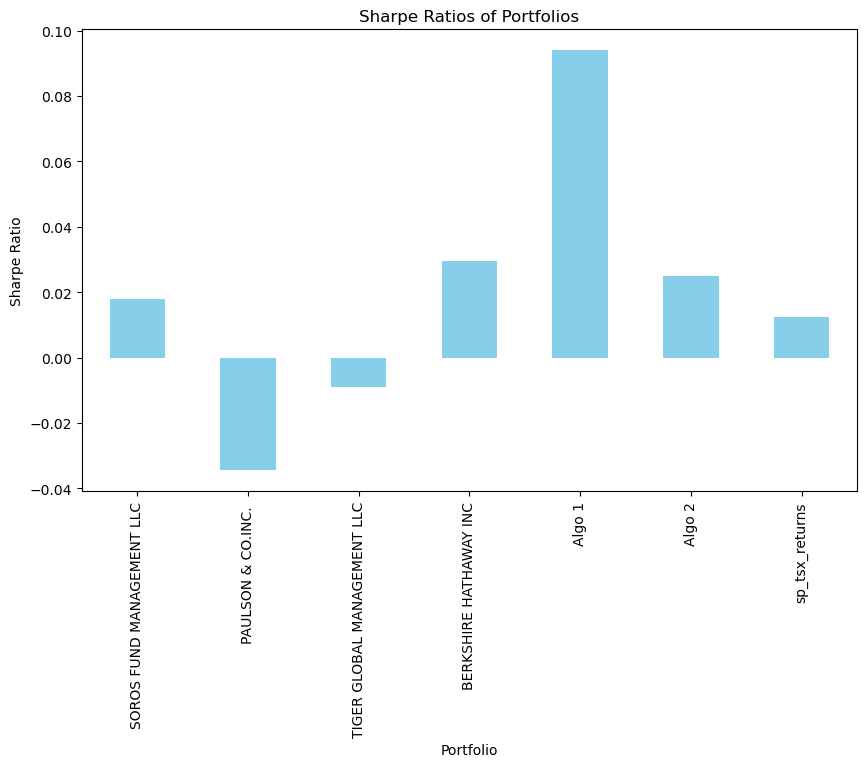

In [633]:
# Visualize the sharpe ratios as a bar plot
plt.figure(figsize=(10, 6))
sharpe_ratios.plot(kind='bar', color='skyblue')
plt.xlabel('Portfolio')
plt.ylabel('Sharpe Ratio')
plt.title('Sharpe Ratios of Portfolios')
plt.show()


### Determine whether the algorithmic strategies outperform both the market (S&P TSX 60) and the whales portfolios.
Among the listed portfolios Algo 1 and Algo 2 conclude with considerably higher Sharpe ratios, which indicates to investors superior risk-adjusted returns. Algo 1 and Algo 2 return a Sharpe ratio of 0.093957 and 0.024997, two of the highest when compared to all portfolios. These elevated share ratios indicate to investors that the algorithmic strategies, Algo 1 and Algo 2, are attractive investments for those seeking equities with greater returns considering their associated risks. 

The plots demonstrate trends in each investment portfolio when analysing the Exponentially Weighted Moving Average (EWMA) with a 21-day half-life for standard deviation. Both Algo 1 and Algo 2 provide consistent returns with less volatility, particularly from 2019 and onwards, when the formation of a downward trend in their EWMA standard deviations commences. The decline in trend provides insight that the risk in these portfolios is reducing over the assessed period, suggesting a shift in market conditions or strategies.

Concerning the correlation matrix, it can be observed that Algo 1 and Algo 2 both present a strong correlation of 0.83, indicating a tendency to perform similarly to each other. It is worth noting there is a strong correlation to the S&P TSX returns too, investors should review these correlations when devising an investment strategy. 

The box plot of daily returns summarises the daily returns of each portfolio. Algo 1 and Algo 2 provide consistent returns throughout the assessed period like Soros Fund Management and Paulson & CO INC. Algo 1 achieves the highest cumulative return of 2.0 of all portfolios during the assessed period, with Algo 2 securing the third-best overall cumulative return at 1.2.

In summary yes algo 1 and 2 outperformed the market and whale portfolios throughout the assessed period of 2015-01 until 2019-04. The reduced volatility and consistent performance of the algorithmic strategies will appeal to investors as stable investment outcomes.


# Create Custom Portfolio

In this section, you will build your own portfolio of stocks, calculate the returns, and compare the results to the Whale Portfolios and the S&P TSX 60. 

1. Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.
2. Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock.
3. Join your portfolio returns to the DataFrame that contains all of the portfolio returns.
4. Re-run the performance and risk analysis with your portfolio to see how it compares to the others.
5. Include correlation analysis to determine which stocks (if any) are correlated.

## Choose 3-5 custom stocks with at last 1 year's worth of historic prices and create a DataFrame of the closing prices and dates for each stock.

In [634]:
#Set file paths
bmw_returns = Path("../Resources/BMW.csv")
mbg_returns = Path("../Resources/MBG.csv")
pah_returns = Path("../Resources/PAH.csv")
rr_returns = Path("../Resources/RR.csv")
vwg_returns = Path("../Resources/VWG.csv")

In [635]:
# Read CSVs and combine all dataframes into a dataframe 
bmw_returns_df = pd.read_csv(bmw_returns, index_col='Date', parse_dates=True)
mbg_returns_df = pd.read_csv(mbg_returns, index_col='Date', parse_dates=True)
pah_returns_df = pd.read_csv(pah_returns, index_col='Date', parse_dates=True)
rr_returns_df = pd.read_csv(rr_returns, index_col='Date', parse_dates=True)
vwg_returns_df = pd.read_csv(vwg_returns, index_col='Date', parse_dates=True)

In [636]:
# Combine new custom stocks into one DF
custom_df = pd.concat([bmw_returns_df,mbg_returns_df,pah_returns_df,rr_returns_df,vwg_returns_df], axis=1, join='outer')

# Group the data by date and take the mean of the closing values
custom_df = custom_df.groupby(custom_df.index.date).mean()

# Drop any rows that have all NaN values 
custom_df = custom_df.dropna(how='all')

# Reset Date index
custom_df.reset_index(inplace=True) 

# Display sample data
print(custom_df.head())

        index   Close  Close  Close   Close   Close
0  2015-03-03  111.00  71.75  82.79  321.55  221.60
1  2015-03-04  113.00  73.75  83.41  326.01  224.20
2  2015-03-05  114.50  74.72  84.05  338.02  225.65
3  2015-03-06  115.30  75.37  84.87  338.71  229.85
4  2015-03-09  114.35  75.55  85.56  341.62  232.20


In [637]:
# Reorganize portfolio data by having a column per symbol
custom_df.columns = ['Date','BMW', 'MBG', 'PAH', 'RR', 'VWG']
custom_df.head()

,Date,BMW,MBG,PAH,RR,VWG
0,2015-03-03,111.00,71.75,82.79,321.55,221.60
1,2015-03-04,113.00,73.75,83.41,326.01,224.20
2,2015-03-05,114.50,74.72,84.05,338.02,225.65
3,2015-03-06,115.30,75.37,84.87,338.71,229.85
4,2015-03-09,114.35,75.55,85.56,341.62,232.20


In [638]:
# Calculate daily returns
custom_daily_returns = custom_df.set_index('Date').pct_change()

# Drop any rows that have all NaN values 
custom_daily_returns = custom_daily_returns.dropna() 

# Reset the date index
custom_daily_returns.reset_index(inplace=True)

# Display sample data
custom_daily_returns.head()

,Date,BMW,MBG,PAH,RR,VWG
0,2015-03-04,0.018018,0.027875,0.007489,0.013870,0.011733
1,2015-03-05,0.013274,0.013153,0.007673,0.036839,0.006467
2,2015-03-06,0.006987,0.008699,0.009756,0.002041,0.018613
3,2015-03-09,-0.008239,0.002388,0.008130,0.008591,0.010224
4,2015-03-10,-0.005684,-0.016016,-0.005493,-0.022598,-0.003876


## Calculate the weighted returns for the portfolio assuming an equal number of shares for each stock

In [639]:
# Set weights
weights = [.2, .2, .2, .2, .2]

# Calculate portfolio return
custom_daily_returns['Davids Returns'] = custom_daily_returns[['BMW', 'MBG', 'PAH', 'RR', 'VWG']].dot(weights)

# Display sample data
print(custom_daily_returns.head())


         Date       BMW       MBG       PAH        RR       VWG  \
0  2015-03-04  0.018018  0.027875  0.007489  0.013870  0.011733   
1  2015-03-05  0.013274  0.013153  0.007673  0.036839  0.006467   
2  2015-03-06  0.006987  0.008699  0.009756  0.002041  0.018613   
3  2015-03-09 -0.008239  0.002388  0.008130  0.008591  0.010224   
4  2015-03-10 -0.005684 -0.016016 -0.005493 -0.022598 -0.003876   

   Davids Returns  
0        0.015797  
1        0.015481  
2        0.009219  
3        0.004219  
4       -0.010734  


## Join your portfolio returns to the DataFrame that contains all of the portfolio returns

In [640]:
# Join your returns DataFrame to the original returns DataFrame
david_returns_column = custom_daily_returns[['Date', 'Davids Returns']].set_index('Date')

# Concatenate 'David_Returns' to 'combined_df'
final_df = pd.concat([combined_df, david_returns_column], axis=1)
final_df = final_df.dropna(how='any')

# Display updated 'combined_df'
print(final_df.head())

            SOROS FUND MANAGEMENT LLC  PAULSON & CO.INC.   \
Date                                                        
2015-03-04                   0.002230            0.003241   
2015-03-05                   0.004016            0.004076   
2015-03-06                  -0.007905           -0.003574   
2015-03-09                   0.000582            0.004225   
2015-03-10                  -0.010263           -0.005341   

            TIGER GLOBAL MANAGEMENT LLC  BERKSHIRE HATHAWAY INC    Algo 1  \
Date                                                                        
2015-03-04                    -0.002534                0.004213 -0.008589   
2015-03-05                     0.002355                0.006726 -0.000955   
2015-03-06                    -0.008481               -0.013098 -0.004957   
2015-03-09                     0.005843               -0.001652 -0.005447   
2015-03-10                    -0.012079               -0.009739 -0.001392   

              Algo 2  sp_tsx_ret

## Re-run the risk analysis with your portfolio to see how it compares to the others

### Calculate the Annualized Standard Deviation

In [641]:
 # Calculate the annualized `std`
final_std = final_df.std()

# Calculate the annualized standard deviation (assuming 252 trading days in a year)
final_annualized_std = final_std * np.sqrt(252)

# Display the annualized standard deviation
print(final_annualized_std)

SOROS FUND MANAGEMENT LLC      0.124118
PAULSON & CO.INC.              0.110851
TIGER GLOBAL MANAGEMENT LLC    0.172556
BERKSHIRE HATHAWAY INC         0.203968
Algo 1                         0.120517
Algo 2                         0.132264
sp_tsx_returns                 0.111743
Davids Returns                 0.238207
dtype: float64


### Calculate and plot rolling `std` with 21-day window

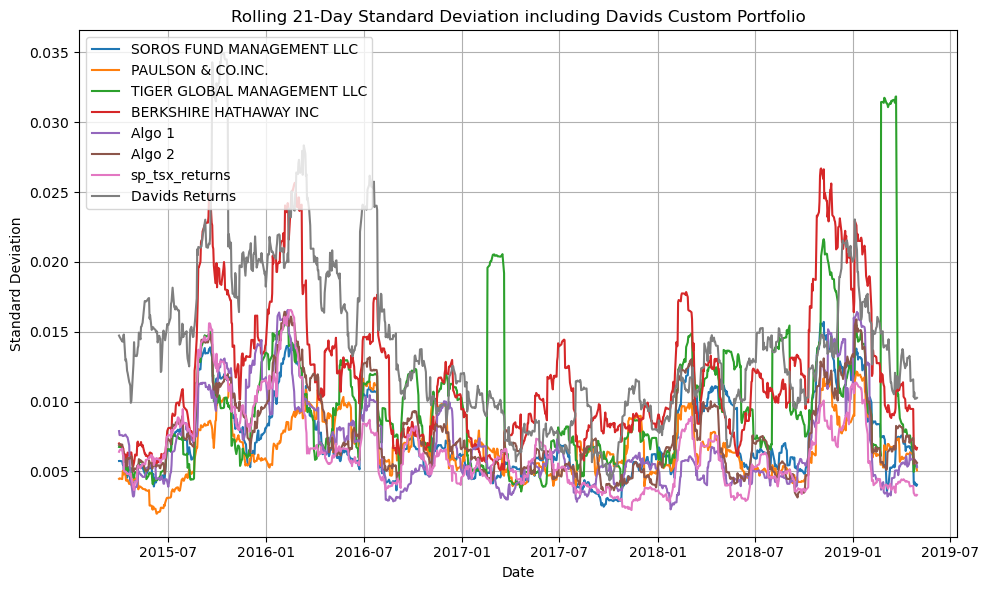

In [642]:
# Calculate the rolling standard deviation for all portfolios using a 21-day window
final_rolling_std = final_df.rolling(window=21).std()

# Plot the rolling standard deviation
plt.figure(figsize=(10, 6))
for column in final_df.columns:
    plt.plot(final_rolling_std.index, final_rolling_std[column], label=column)

plt.title('Rolling 21-Day Standard Deviation including Davids Custom Portfolio')
plt.xlabel('Date')
plt.ylabel('Standard Deviation')
plt.legend(loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

### Calculate and plot the correlation

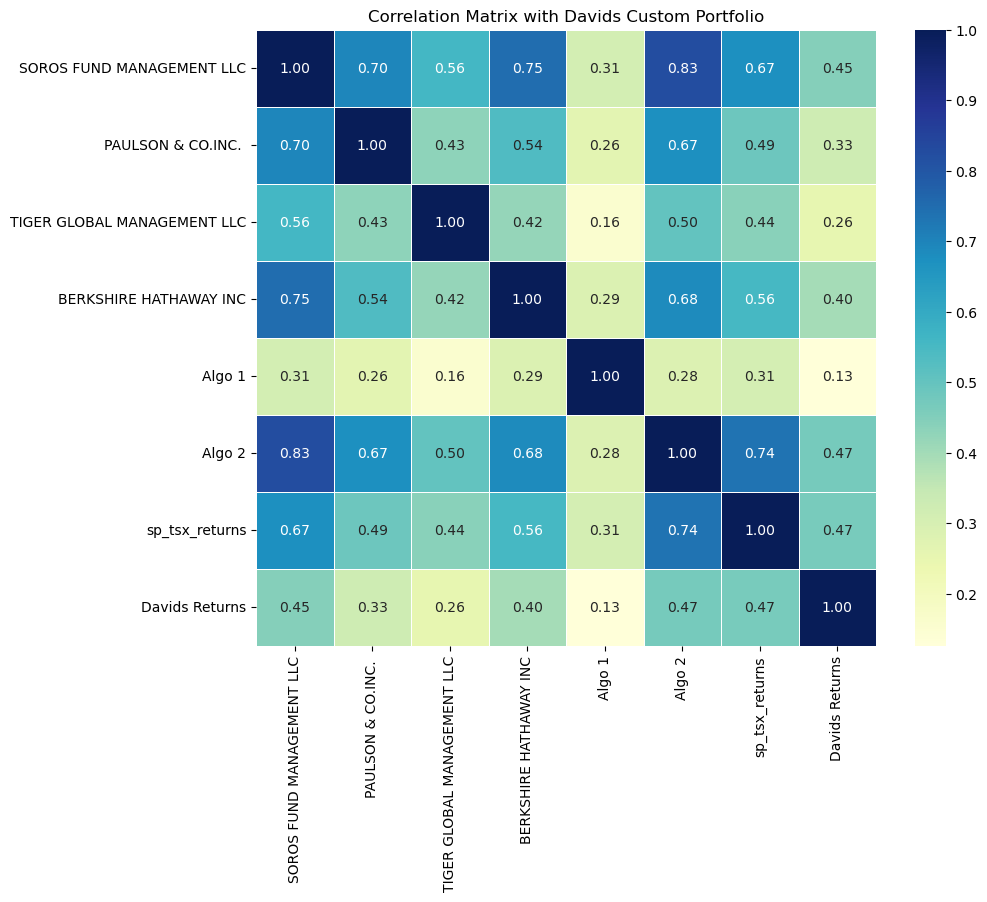

In [643]:
# Calculate and plot the correlation
final_correlation_matrix = final_df.corr()

# Plot the correlation matrix as a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(final_correlation_matrix, annot=True, cmap='YlGnBu', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix with Davids Custom Portfolio')
plt.show()

### Calculate and Plot the 60-day Rolling Beta for Your Portfolio compared to the S&P 60 TSX

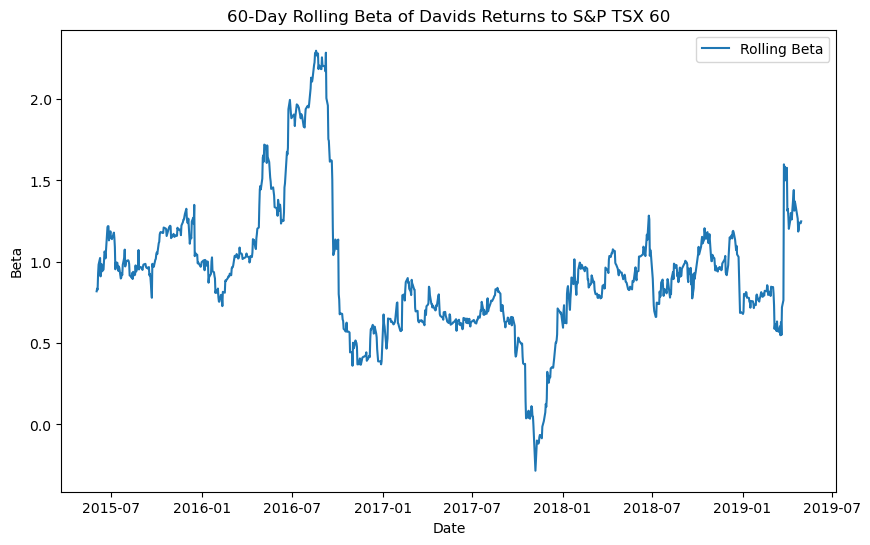

In [644]:
# Assign davids returns and sp tsx returns specifically for plotting this beta
davids_returns = final_df['Davids Returns']
sp_tsx_returns = final_df['sp_tsx_returns']

# Calculate the 60-day rolling covariance between 'Davids Returns' and 'sp_tsx_returns'
rolling_covariance = davids_returns.rolling(window=60).cov(sp_tsx_returns)

# Calculate the 60-day rolling variance of 'sp_tsx_returns'
rolling_sp_tsx_variance = sp_tsx_returns.rolling(window=60).var()

# Calculate the 60-day rolling beta
rolling_beta = rolling_covariance / rolling_sp_tsx_variance

# Plot the 60-day rolling beta
plt.figure(figsize=(10, 6))
plt.plot(rolling_beta.index, rolling_beta, label='Rolling Beta')
plt.xlabel('Date')
plt.ylabel('Beta')
plt.title('60-Day Rolling Beta of Davids Returns to S&P TSX 60')
plt.legend()
plt.show()


### Using the daily returns, calculate and visualize the Sharpe ratios using a bar plot

In [645]:
final_mean_daily_returns = final_df.mean()
sharpe_ratios = (final_mean_daily_returns - risk_free_rate) / final_std


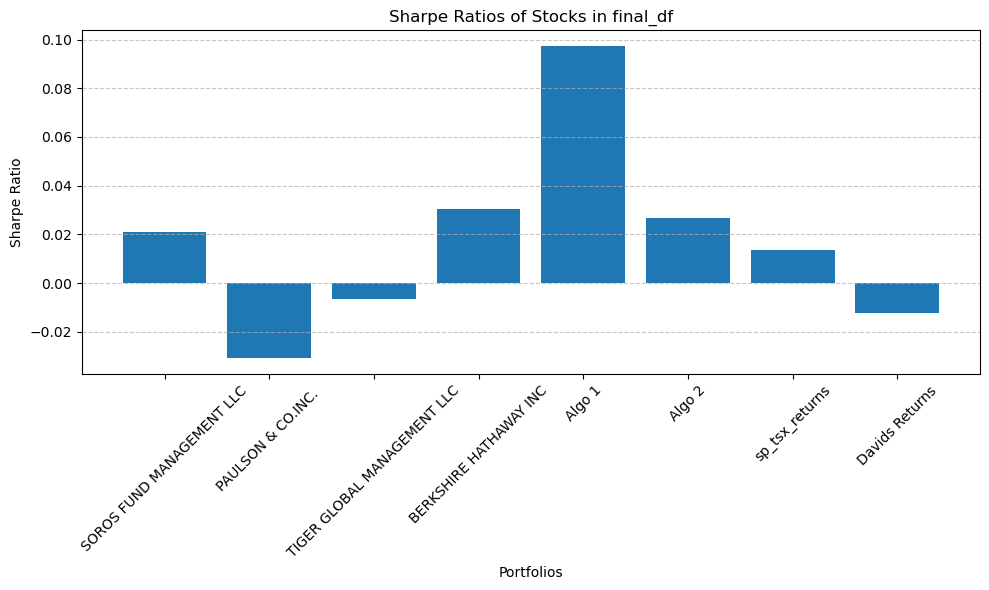

In [646]:
# Plot the Sharpe Ratios
plt.figure(figsize=(10, 6))
plt.bar(sharpe_ratios.index, sharpe_ratios)
plt.xlabel('Portfolios')
plt.ylabel('Sharpe Ratio')
plt.title('Sharpe Ratios of Stocks in final_df')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [647]:
sharpe_ratios

SOROS FUND MANAGEMENT LLC      0.020890
PAULSON & CO.INC.             -0.030783
TIGER GLOBAL MANAGEMENT LLC   -0.006387
BERKSHIRE HATHAWAY INC         0.030493
Algo 1                         0.097368
Algo 2                         0.026896
sp_tsx_returns                 0.013674
Davids Returns                -0.012403
dtype: float64

### How does your portfolio do?

David’s returns display a positive correlation of 0.466 with the S&P TSX 60 index, this observation indicates that the performance is influenced mildly by market movements. The strongest correlation is David’s returns with Algo 2 at 0.470. The weakest correlation is against Algo 1 at 0.126, all other portfolios share a moderate positive correlation. Overall, the custom portfolio fluctuates with most portfolios and the market provides few opportunities for diversifying investment. 

David’s returns possess the highest annualized standard deviation of 0.238 across all the assessed portfolios. This illustrates an increased volatility compared to other portfolios. Larger price movements may appeal to certain investment strategies but generally indicate a greater risk in comparison to other investment opportunities analysed. Furthermore, the Sharpe ratio from David’s returns is negative indicating poor risk-adjusted returns. The beta analysis reveals fluctuations in portfolio sensitivity to the market. It exhibits a moderate positive correlation with the S&P TSX 60 index and other portfolios, providing insights for investors on its performance concerning market trends.
